# C. Analysis
- C.1 Descriptive Statistics
- C.2 Regression Models
- C.3 Results

# C.1 Descriptive Statistics

* Variables: sex, age, BMI, and marathon time
* Comparative country-level indicators: altitude, number of participants, and performance ranks

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_v = pd.read_csv("8. Marathon_all.csv")

In [4]:
df_v.columns

Index(['year', 'location', 'sex', 'rank', 'name', 'country', 'time',
       'birthdate', 'birthplace', 'height', 'weight', 'affiliation', 'time_m',
       'birth_country', 'birth_country_iso', 'birth_country_full', 'latitude',
       'longitude', 'altitude', 'country_altitude', 'gni_per_capita',
       'population', 'sex_dummy', 'age', 'bmi', 'log_time_m', 'gni_log',
       'pop_log', 'alt_cn_log', 'alt_br_log'],
      dtype='object')

In [38]:
# df_v =df_v[['year', 'sex', 'rank', 'time_m', 'name', 'age', 'bmi', 'country', 
#             'birth_country_full', 'altitude', 'country_altitude', 'gni_per_capita',
#        'population', 'gni_log','pop_log', 'alt_cn_log', 'alt_br_log']]

In [5]:
df_v.describe()

,year,rank,time_m,age,bmi,altitude,country_altitude,gni_per_capita,population
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1004.00000,1004.000000,1004.000000,1.004000e+03
mean,2011.176119,47.020896,149.668915,31.517413,19.298109,757.88745,730.711155,17113.097610,8.263676e+07
std,6.442345,31.786773,12.980042,4.444763,1.441891,882.40693,567.617271,19460.942178,2.201930e+08
min,2000.000000,1.000000,126.530000,19.000000,15.600000,0.00000,0.000000,120.000000,2.679900e+04
25%,2004.000000,21.000000,139.530000,29.000000,18.400000,59.00000,330.000000,1855.000000,9.920362e+06
50%,2012.000000,42.000000,148.350000,31.000000,19.300000,373.50000,600.000000,8725.000000,3.086649e+07
75%,2016.000000,67.000000,156.730000,34.000000,20.100000,1296.00000,1034.000000,29420.000000,6.019125e+07
max,2020.000000,139.000000,214.450000,46.000000,25.400000,4274.00000,3265.000000,121890.000000,1.411100e+09


### Distribution of Sex, Age, BMI, and Marathon Time

Summary statistics were computed to examine the overall distribution of demographic and physical characteristics among Olympic marathon runners.

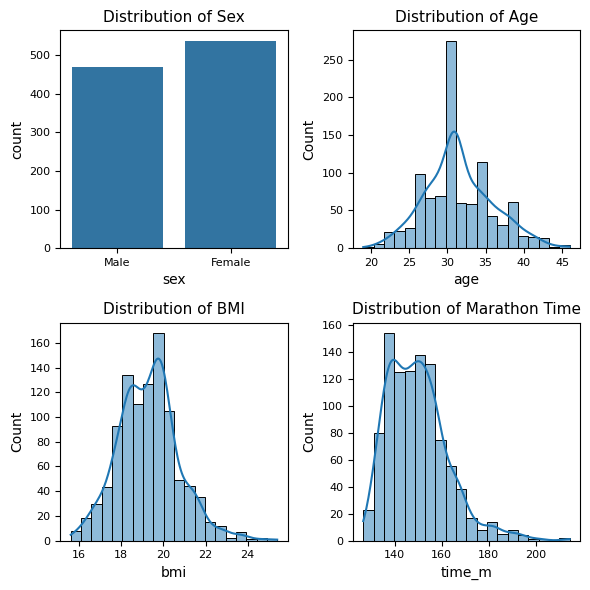

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6)) 

plt.rcParams.update({
    "axes.titlesize": 11,
    "axes.labelsize": 8,
    "legend.fontsize": 8
})

# 1. Sex distribution (bar plot)
sns.countplot(x='sex', data=df_v, ax=axes[0,0])
axes[0,0].set_xticks([0,1])
axes[0,0].set_xticklabels(['Male','Female'])
axes[0,0].set_title("Distribution of Sex")

# 2. Age distribution (histogram)
sns.histplot(df_v['age'], bins=20, kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribution of Age")

# 3. BMI distributbion
sns.histplot(df_v['bmi'], bins=20, kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribution of BMI")

# 4. Marathon time distribution
sns.histplot(df_v['time_m'], bins=20, kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribution of Marathon Time")

plt.tight_layout()
plt.show()

### Top 10 Highest-Altitude Countries and Top 10 Fastest Runner Countries

The top ten countries by average altitude and the top ten countries with the highest number of runners finishing in the top 10 were identified.

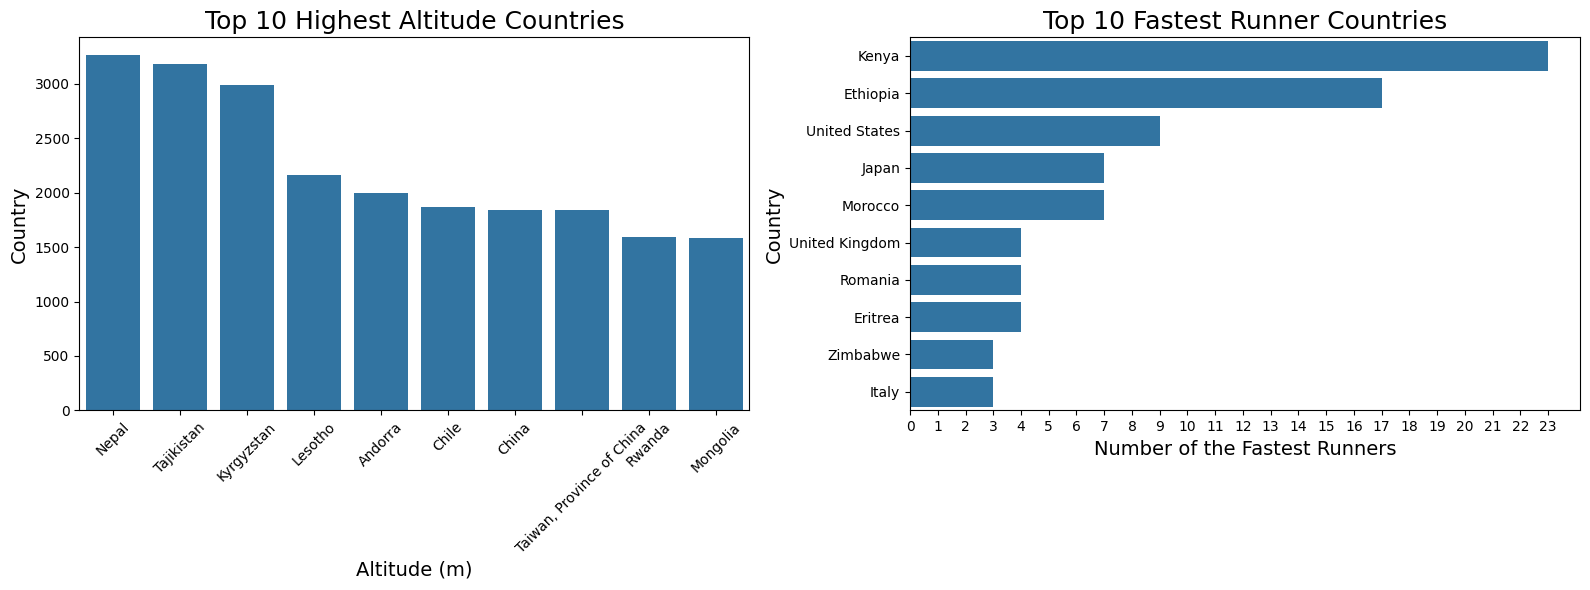

In [191]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Top highest-altitude countries
df_alt = df_v[['birth_country_full','country_altitude']].drop_duplicates()
df_alt = df_alt.sort_values(by='country_altitude', ascending=False).head(10)

sns.barplot(y='country_altitude', x='birth_country_full', data=df_alt, ax=axes[0])
axes[0].set_title("Top 10 Highest Altitude Countries")
axes[0].set_xlabel("Altitude (m)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel("Country")

# 2. Top 10 Countries with Fastest Runners
# Define "fast"
fast_threshold = 10
fast_runners = df_v[df_v['rank'] < fast_threshold]
# count fast runners per country
fast_country_counts = fast_runners['birth_country_full'].value_counts()
df_fast = fast_country_counts[:10].reset_index()

sns.barplot(x='count', y='birth_country_full', data=df_fast, ax=axes[1])
axes[1].set_title("Top 10 Fastest Runner Countries")
axes[1].set_xlabel("Number of the Fastest Runners")
axes[1].set_xticks(range(0, df_fast.loc[0,"count"]+1))
axes[1].set_ylabel("Country")

plt.tight_layout()
plt.show()

**Notably, no country appears in both lists, suggesting that a high average country altitude alone does not guarantee elite marathon performance.**

### Top 10 Countries with the Most Participants

The countries with the highest number of marathon participants across the six Olympic Games were identified to highlight patterns of national representation.

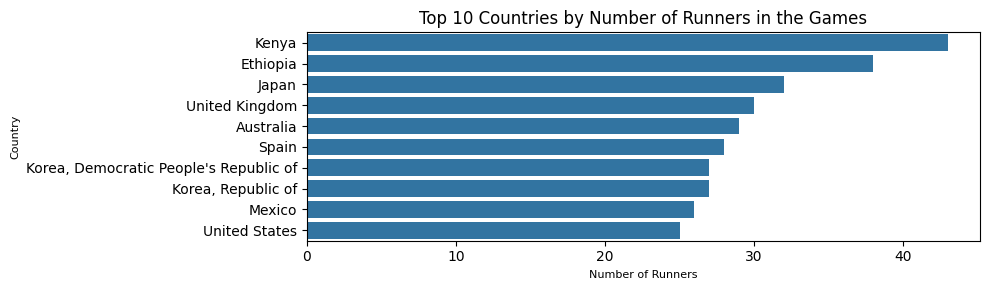

In [41]:
country_counts = df_v['birth_country_full'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
top10 = country_counts.head(10)
plt.rcParams.update({
    "axes.titlesize": 12,
    "axes.labelsize": 8,
})

plt.figure(figsize=(10, 3))
sns.barplot(data=top10, x='count', y='country')
plt.ylabel("Country")
plt.xlabel("Number of Runners")
plt.title("Top 10 Countries by Number of Runners in the Games")
plt.tight_layout()
plt.show()

In [114]:
# # Count distinct birth countries within each representative country
# country_counts = df_v.groupby('country')['birth_country_full'].nunique().reset_index()
# country_counts = country_counts[country_counts['birth_country_full'] > 1]
# print(country_counts.shape)
# country_counts = country_counts.sort_values(by='birth_country_full', ascending=False)
# country_counts[:10]

### Distribution of Birth Region Altitude and Country Average Altitude

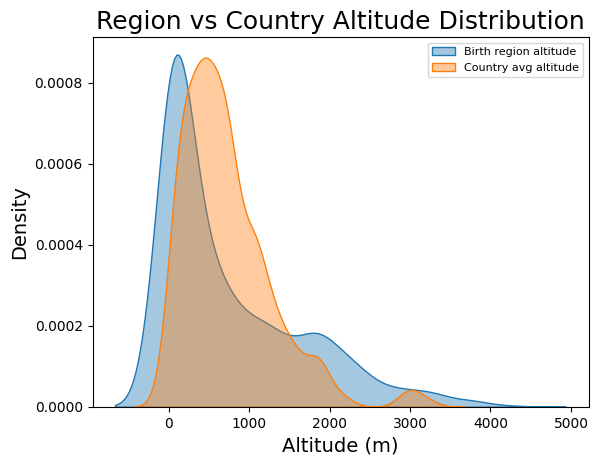

In [146]:
sns.kdeplot(df_v['altitude'], label='Birth region altitude', fill=True, alpha=0.4)
sns.kdeplot(df_v['country_altitude'], label='Country avg altitude', fill=True, alpha=0.4)
plt.xlabel('Altitude (m)')
plt.title('Region vs Country Altitude Distribution')
plt.legend()
plt.show()

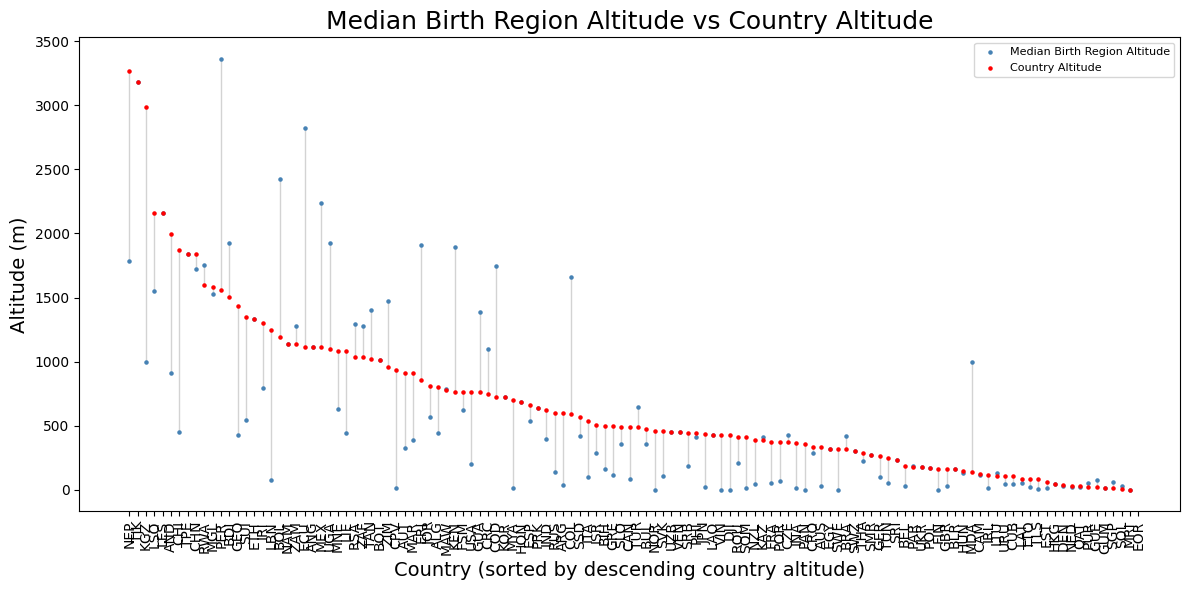

In [175]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute median birth-region altitude per country
medians = df_v.groupby('birth_country')['altitude'].median().reset_index()

# Get country altitude (assuming one value per country)
country_alt = df_v[['birth_country', 'country_altitude']].drop_duplicates()

# Sort by country altitude descending
country_alt = country_alt.sort_values('country_altitude', ascending=False)

# Reorder median data to match sorted countries
medians = medians.set_index('birth_country').loc[country_alt['birth_country']].reset_index()

plt.figure(figsize=(12, 6))

# Draw grey lines connecting the two dots for each country
for i, row in country_alt.iterrows():
    country = row['birth_country']
    plt.plot(
        [country, country],
        [medians.loc[medians['birth_country']==country, 'altitude'].values[0],
         row['country_altitude']],
        color='lightgray',
        linewidth=1,
        zorder=1
    )

# Plot median birth-region altitudes (blue dots)
plt.scatter(
    medians['birth_country'],
    medians['altitude'],
    color='steelblue',
    s=5,
    label='Median Birth Region Altitude',
    zorder=2
)

# Plot country altitude (red dots)
plt.scatter(
    country_alt['birth_country'],
    country_alt['country_altitude'],
    color='red',
    s=5,
    label='Country Altitude',
    zorder=3
)

plt.xlabel('Country (sorted by descending country altitude)')
plt.ylabel('Altitude (m)')
plt.title('Median Birth Region Altitude vs Country Altitude')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Interestingly, the higher average altitude the country has, the more variation in birth region altitude.

**Compute ICC (intraclass correlation-how much variance is at country level). If ICC is non-trivial (> ~0.05–0.10), mixed model is strongly justified.**

In [91]:
# between-country variance / total variance approximation from ANOVA
group_var = df.groupby('birth_country')['time'].mean().var()
resid_var = df['time'].var() - group_var
icc = group_var / (group_var + resid_var)
print("Approx ICC:", icc)

Approx ICC: 0.9884024928931762


### Distribution of Runner Birth-Region Altitude vs. Country Average Altitude in the Top-Performing Countries

The distribution of individual birth region altitudes was compared with country-level average altitudes to assess within-country variation.

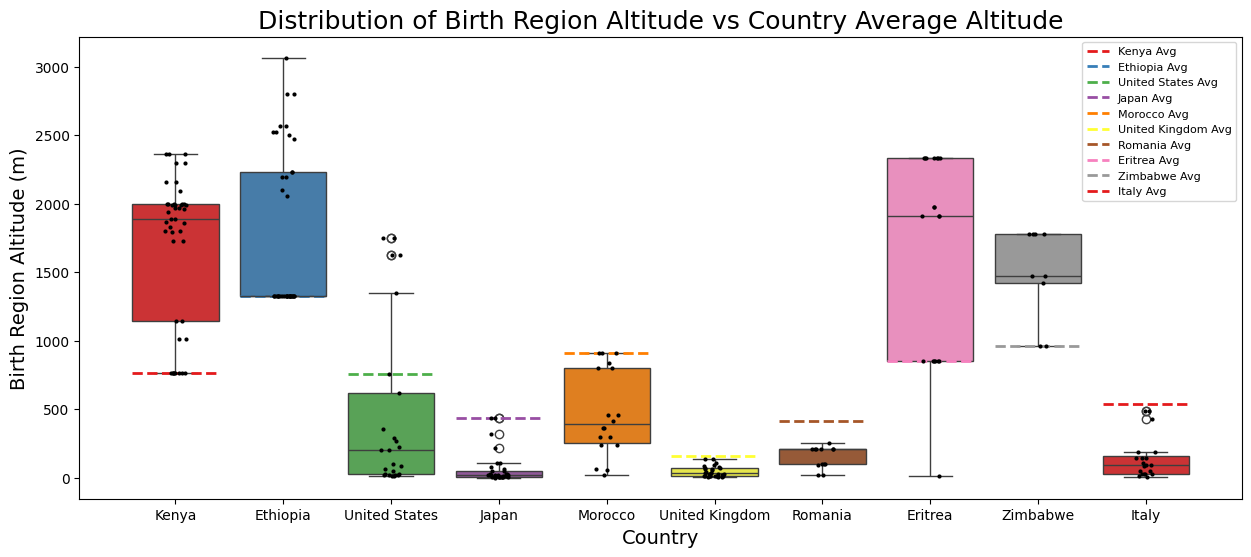

In [145]:
# Filter top 5 fastest countries
top_5 = df_fast['birth_country_full'].unique()
df_top5 = df_v[df_v['birth_country_full'].isin(top_5)]
avg_altitudes = df_top5.groupby('birth_country_full')['country_altitude'].mean().to_dict()
palette = sns.color_palette("Set1", n_colors=10)
line_colors = {country: color for country, color in zip(top_5, palette)}

plt.figure(figsize=(15,6))

sns.boxplot(
    data=df_top5,
    x='birth_country_full',
    y='altitude',
    hue='birth_country_full',
    order=top_5,
    palette=line_colors,
)
sns.stripplot(
    data=df_top5,
    x='birth_country_full',
    y='altitude',
    color='black',
    size=3,
    jitter=True
)
# Draw horizontal lines only within each box
for i, country in enumerate(top_5):
    avg_alt = avg_altitudes[country]
    # x positions: box centered at i, width ~0.8
    plt.hlines(y=avg_alt, xmin=i-0.4, xmax=i+0.4, colors=line_colors[country],
               linestyles='--', linewidth=2,label=f'{country} Avg')

plt.ylabel("Birth Region Altitude (m)")
plt.xlabel("Country")
plt.title("Distribution of Birth Region Altitude vs Country Average Altitude")
plt.legend()
plt.show()

Consistent with prior research, many runners from **Kenya** and **Ethiopia**—two of the top-performing countries—were born in regions situated **above their respective national average elevations**. This pattern may support the hypothesis that long-term exposure to high-altitude environments may contribute to endurance performance advantages.

### Distribution of Runner Birth-Region Altitude vs. Country Average Altitude in the Highest-Altitude Countries”


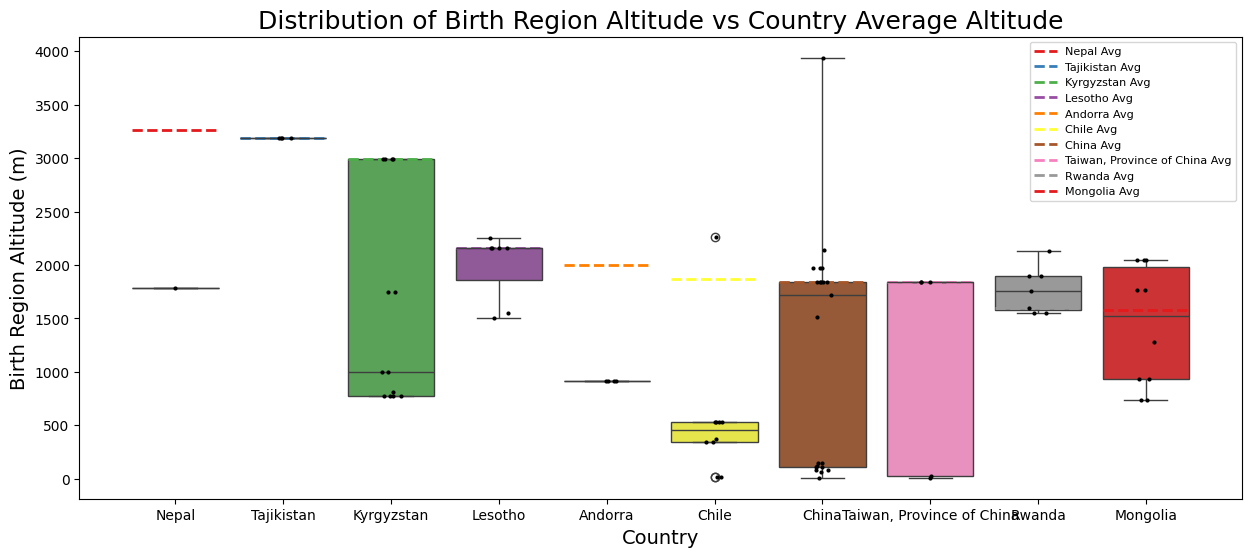

In [189]:
# Filter top 5 highest altitude countries
top_alt = df_v[['birth_country_full','country_altitude']].drop_duplicates()
top_alt = top_alt.sort_values(by='country_altitude', ascending=False).head(10)
top_alt = top_alt['birth_country_full'].unique()
df_top_alt = df_v[df_v['birth_country_full'].isin(top_alt)]
avg_altitudes = df_top_alt.groupby('birth_country_full')['country_altitude'].mean().to_dict()

palette = sns.color_palette("Set1", n_colors=10)
line_colors = {country: color for country, color in zip(top_alt, palette)}

plt.figure(figsize=(15,6))

sns.boxplot(
    data=df_top_alt,
    x='birth_country_full',
    y='altitude',
    hue='birth_country_full',
    order=df_alt,
    palette=line_colors,
)
sns.stripplot(
    data=df_top_alt,
    x='birth_country_full',
    y='altitude',
    color='black',
    size=3,
    jitter=True
)
# Draw horizontal lines only within each box
for i, country in enumerate(top_alt):
    avg_alt = avg_altitudes[country]
    # x positions: box centered at i, width ~0.8
    plt.hlines(y=avg_alt, xmin=i-0.4, xmax=i+0.4, colors=line_colors[country],
               linestyles='--', linewidth=2,label=f'{country} Avg')

plt.ylabel("Birth Region Altitude (m)")
plt.xlabel("Country")
plt.title("Distribution of Birth Region Altitude vs Country Average Altitude")
plt.legend()
plt.show()

Unlike Kenya and Ethiopia, most runners from the highest-altitude countries do not come from regions above their national average elevation. Overall, there is no clear pattern among the top 10 highest-altitude countries. However, since the country averages are already very high, all runners from Nepal, Tajikistan, and Lesotho are from regions above 1,500 m, with Tajikistan’s runners all originating from elevations over 3,000 m.

### Correlation of country altitude and marathon time

----Country altitude----
Pearson correlation : -0.108
Spearman correlation: -0.071
----Birth region altitude----
Pearson correlation : -0.034
Spearman correlation: -0.034


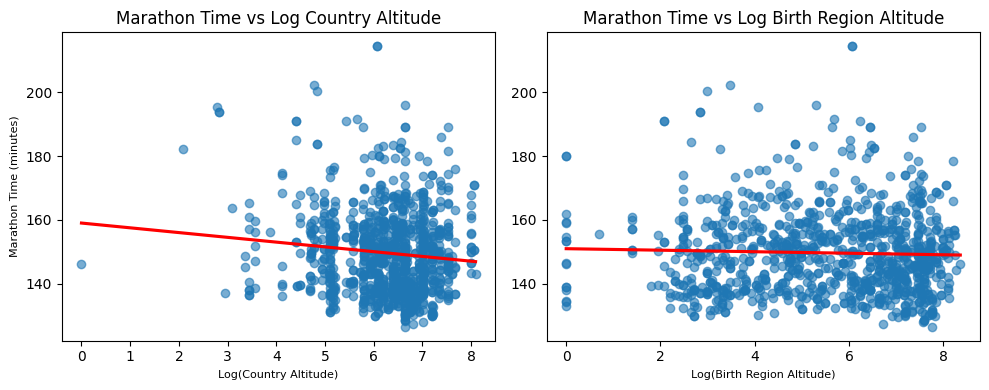

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Plot 1: Country Altitude ---
sns.regplot(
    x='alt_cn_log', y='time_m', data=df_v,
    ax=axes[0], ci=None, scatter_kws={'alpha':0.6}, line_kws={'color':'red'}
)
axes[0].set_xlabel("Log(Country Altitude)")
axes[0].set_ylabel("Marathon Time (minutes)")
axes[0].set_title("Marathon Time vs Log Country Altitude")

pearson_cn = df_v[['alt_cn_log','time_m']].corr().iloc[0,1]
spearman_cn = df_v[['alt_cn_log','time_m']].corr(method='spearman').iloc[0,1]
print("----Country altitude----")
print(f"Pearson correlation : {pearson_cn:.3f}")
print(f"Spearman correlation: {spearman_cn:.3f}")

# --- Plot 2: Birth Region Altitude ---
sns.regplot(
    x='alt_br_log', y='time_m', data=df_v,
    ax=axes[1], ci=None, scatter_kws={'alpha':0.6}, line_kws={'color':'red'}
)
axes[1].set_xlabel("Log(Birth Region Altitude)")
axes[1].set_ylabel("")  # remove repeated y-label
axes[1].set_title("Marathon Time vs Log Birth Region Altitude")

pearson_br = df_v[['alt_br_log','time_m']].corr().iloc[0,1]
spearman_br = df_v[['alt_br_log','time_m']].corr(method='spearman').iloc[0,1]
print("----Birth region altitude----")
print(f"Pearson correlation : {pearson_br:.3f}")
print(f"Spearman correlation: {spearman_br:.3f}")

plt.tight_layout()
plt.show()

Both country- and birth-region-level altitudes show **very weak negative correlations** with marathon time. For country altitude, Pearson (-0.108) and Spearman (-0.071) indicate a slight, almost negligible tendency for runners from higher-altitude countries to have faster times, but the relationship is essentially flat. For birth-region altitude, both correlations (-0.034) are near zero, suggesting **no meaningful linear or rank-based association** between regional altitude and marathon performance. Overall, altitude at either level appears to have **minimal direct correlation** with marathon time in this dataset.


# C.2 Regression Models


### Regression Strategy

I will estimate three complementary models:

1. **Between-country regression**
   * Uses country-average altitude.
   * Captures broad **country-level factors** (altitude + income, population, unobserved factors such as culture and institutions, etc.).
   * Interpretation: Effect may partly reflect altitude, but also correlated national traits.
---
2. **Within-country regression**
   * Uses altitude variation within the same country.
   * Country traits are absorbed/controlled.
   * Interpretation: Closer to isolating the **causal effect of altitude**, since cross-country heterogeneity(Systematic differences across countries (economic, cultural, genetic, etc.)) is removed.
---
3. **Hierarchical model (nesting runners within countries)**
    * Avoids ecological fallacy because you explicitly separate runner- vs country-level variation.
    *The ecological fallacy happens when you take a relationship observed at the group level (e.g., countries) and assume it also holds at the individual level (e.g., runners).
   * Interpretation: Separates **within-country altitude effects** from **between-country altitude effects** in one model, while allowing for clustering of runners within countries.

---

### Interpreting Results

|                                | **Within-country effect = 0**                                                                               | **Within-country effect ≠ 0**                                                      |
| ------------------------------ | ----------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **Country-average effect = 0** | 🚫 No altitude effect at either level                                                                       | 🌍 **Local effect only** → altitude matters *within countries* but not across them |
| **Country-average effect ≠ 0** | 🌐 **Country-level effect only** → altitude proxy for other national factors (GDP, culture, genetics, etc.) | ✅ **Robust effect** → consistent evidence across and within countries              |

- Special case: If signs differ (positive at one level, negative at the other), it may indicate aggregation bias (Simpson’s paradox) or strong confounding.

--- 

### Check correlation and multicollinearity of vars

In [92]:
df = pd.read_csv("9. Marathon_final.csv")

In [93]:
df.head(3)

,year,sex,time,name,country,birth_country,age,bmi,alt_br_log,alt_cn_log,gni_log,pop_log
0,2020,1,147.33,Peres Jepchirchir,KEN,KEN,27.0,18.4,7.545390,6.637258,7.554859,17.770925
1,2020,1,147.60,Brigid Kosgei,KEN,KEN,26.0,18.4,7.739359,6.637258,7.554859,17.770925
2,2020,1,147.77,Molly Seidel,USA,USA,26.0,19.1,5.605802,6.634633,11.081219,19.619373


* `time` = marathon time, in minutes
* `alt_cn_log` = log of country average altitude
* `gni_log` = log of country income by year
* `pop_log` = log of country population by year
* `year` = year of the race

Note: Why var 'year' in included?
- Time trends: Marathon performance may improve over the years due to: Better training methods, Improved nutrition, Technological improvements (shoes, tracks), Selection of elite runners
- Policy or event effects: Some games might have different courses, weather, or regulations affecting times.
- If you don’t include year, your altitude or country-level effects could be confounded by time trends.

Here, I will use numeric trend to capture gradual improvement across many years.

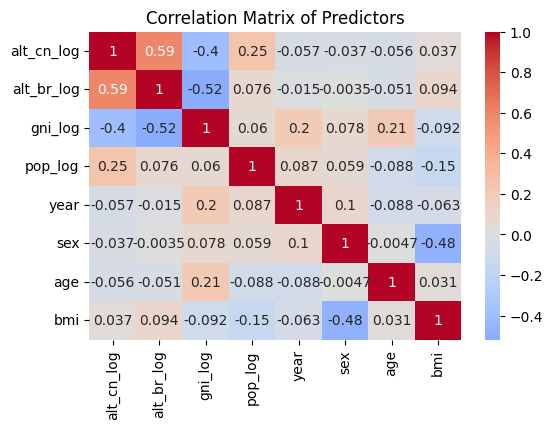

In [94]:
# Check correlation of variables
X = df[["alt_cn_log","alt_br_log", "gni_log", "pop_log", "year", "sex", "age", "bmi"]]
corr = X.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Predictors")
plt.show()

Correlation close to +1 or –1 → very strong linear relationship.
If you see correlations > 0.8 (rule of thumb), that’s usually the pair causing collinearity.

In [95]:
# VIF check (multicollinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[["alt_cn_log","alt_br_log", "gni_log", "pop_log", "year","sex","age","bmi"]]   
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]
print(vif)


     Variable            VIF
0       const  106132.186995
1  alt_cn_log       1.693927
2  alt_br_log       1.842397
3     gni_log       1.609772
4     pop_log       1.146203
5        year       1.090492
6         sex       1.311632
7         age       1.089086
8         bmi       1.337358


- VIF = 1 → No correlation.
- 1 < VIF < 5 → Moderate correlation, usually acceptable.
- VIF ≥ 5 (sometimes ≥ 10) → High multicollinearity → consider removing/reducing variables.

---
## 1. Between-country Regression
* Uses variation between countries (average altitude, GNI, population, etc.).
* ✅ Good for detecting country-level effects.
* ❌ But may conflate altitude with other correlated country traits.
  * e.g., high-altitude countries (Kenya/Ethiopia) also happen to have strong running culture.
* If the country-average altitude coefficient is zero, it suggests altitude differences between countries don’t explain performance once you account for other country factors.

### Model 1a: Baseline OLS with Country-Level Controls

* The outcome variable is the **average marathon time by country and year**.
* This model examines whether countries at higher average altitudes tend to have **faster or slower mean marathon times**, controlling for gross national income (GNI), population size, and year.

In [96]:
df['birth_country'].unique().shape

(121,)

In [97]:
# time of country-year averages
df['avg_time_y'] = df.groupby(["birth_country", "year"])["time"].transform('mean')
df.head(2)

,year,sex,time,name,country,birth_country,age,bmi,alt_br_log,alt_cn_log,gni_log,pop_log,avg_time_y
0,2020,1,147.33,Peres Jepchirchir,KEN,KEN,27.0,18.4,7.545390,6.637258,7.554859,17.770925,147.63375
1,2020,1,147.60,Brigid Kosgei,KEN,KEN,26.0,18.4,7.739359,6.637258,7.554859,17.770925,147.63375


In [63]:
# pip install statsmodels
import statsmodels.formula.api as smf

In [98]:
model_1a = smf.ols("avg_time_y ~ alt_cn_log + gni_log + pop_log + year", data=df).fit()
model_1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_time_y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     17.88
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           3.42e-14
Time:                        11:37:31   Log-Likelihood:                -3624.7
No. Observations:                1004   AIC:                             7259.
Df Residuals:                     999   BIC:                             7284.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.4681     90.161     -1.414      0.158    -304.394      49.458
alt_cn_log    -0.8844      0.345     -2.567      0.010      -1.560      -0.208
gni_log        0.0909      0.194      0.468      0.640      -0.290       0.472
pop_log       -1.1449      0.184     -6.206      0.000      -1.507      -0.783
year           0.1498      0.045      3.325      0.001       0.061       0.238
==============================================================================
Omnibus:                      412.516   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2989.447
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                      10.728   Cond. No.                     6.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 1b: Baseline OLS with Clustered Standard Errors

* Specification is identical to Model 1a, but **standard errors are clustered by country** to account for potential **within-country correlation** in residuals across years.

In [120]:
model_1b = smf.ols('avg_time_y ~ alt_cn_log + gni_log + pop_log + year', 
                data=df).fit(cov_type='cluster', cov_kwds={'groups': df['birth_country']})
model_1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_time_y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.972
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           0.000963
Time:                        20:19:28   Log-Likelihood:                -3624.7
No. Observations:                1004   AIC:                             7259.
Df Residuals:                     999   BIC:                             7284.
Df Model:                           4                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.4681    162.865     -0.783      0.434    -446.678     191.741
alt_cn_log    -0.8844      0.779     -1.136      0.256      -2.410       0.641
gni_log        0.0909      0.484      0.188      0.851      -0.858       1.039
pop_log       -1.1449      0.396     -2.892      0.004      -1.921      -0.369
year           0.1498      0.081      1.845      0.065      -0.009       0.309
==============================================================================
Omnibus:                      412.516   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2989.447
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                      10.728   Cond. No.                     6.41e+05
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 6.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
### 🔹 Model 1 Results: Between-country OLS 

| Variable       | Coefficient (β) | p-value (Regular SEs) | p-value (Clustered SEs) |                             
| -------------- | --------------- | --------------------- | ----------------------- | 
| **alt_cn_log** | −0.884          | 0.010                 | 0.256                   | 
| **gni_log**    | +0.091          | 0.640                 | 0.851                   | 
| **pop_log**    | −1.145**          | <0.001                | 0.004                   |  
| **year**       | +0.150          | 0.001                 | 0.065                   |  


So after clustering:

* `alt_cn_log` and `year` lose significance — suggesting that within-country correlation over time affects the precision of the estimates.
* `pop_log` remain significant because the signal is strong enough *between countries*.

---
- When alt_cn_log loses significance after clustering by country, it’s a strong hint that:
The differences in marathon times across countries are being driven not just by altitude, but by other unobserved, country-level factors that tend to move together with altitude— altitude may be correlated with those, but not necessarily the true cause. Possible country-level factors are running culture, training systems, genetics, physiology, climate, etc. 

- Suppose marathon time for Kenya changes from 140 → 141 over two years, while country average altitude didn’t change. That change must come from something else — unobserved factors that vary over time (training improvements, policy changes, etc.). Now, if these unobserved factors are also correlated with altitude across countries (e.g., countries at higher altitude also tend to have stronger running culture), then:

> Part of the apparent effect of altitude we saw in the naive regression could actually be coming from these hidden factors.

## 2. Within-country Regression
* Uses variation in altitude across runners inside the same country. Example: Kenyan runners from Rift Valley (2,300m) vs Nairobi (1,800m).
* This design cancels out all country-level factors (culture, GDP, genetics, institutions), because those don’t vary within a single country.
* ✅ Good for estimating the **“pure altitude effect”** (if altitude truly matters for physiology).
* ❌ But it cannot tell you anything about country-level factors (e.g., Kenya vs Ethiopia differences).

### Model 2a: Within-Country OLS with Clustered Standard Errors
* **Outcome:** Individual runner’s marathon time.
* Includes only individual-level covariates (e.g., sex, age, BMI).
* Standard errors are clustered by country to account for within-country correlation.
* A fixed-effects approach is not used here, as clustering adequately captures within-country dependence without introducing numerous country dummy variables.

In [130]:
model_2a = smf.ols(
    "time ~ alt_br_log + year + age + bmi + sex ",
    data=df
).fit(cov_type="cluster", cov_kwds={"groups": df["birth_country"]})

model_2a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,101.1810,148.818,0.680,0.497,-190.497,392.859
alt_br_log,-0.3173,0.303,-1.048,0.295,-0.911,0.276
year,0.0070,0.075,0.094,0.925,-0.139,0.153
age,0.0244,0.097,0.251,0.802,-0.166,0.215
bmi,1.3797,0.381,3.625,0.000,0.634,2.126
sex,18.8363,1.048,17.972,0.000,16.782,20.890


### Model 2b: Within-Country OLS with Clustered Standard Errors and Country-Level Covariates
* Extends Model 2a by adding country-level variables.
* Assesses how both individual and contextual factors jointly explain variation in marathon performance.

In [126]:
model_2b = smf.ols(
    "time ~ alt_br_log + year + age + bmi + sex + gni_log + pop_log",
    data=df
).fit(cov_type="cluster", cov_kwds={"groups": df["birth_country"]})

model_2b.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,67.7794,135.339,0.501,0.617,-197.480,333.039
alt_br_log,-0.2557,0.337,-0.759,0.448,-0.916,0.405
year,0.0386,0.068,0.572,0.568,-0.094,0.171
age,-0.0039,0.089,-0.045,0.964,-0.178,0.170
bmi,1.1195,0.343,3.266,0.001,0.448,1.791
sex,18.7294,1.048,17.865,0.000,16.675,20.784
gni_log,-0.1028,0.478,-0.215,0.830,-1.039,0.833
pop_log,-1.3912,0.342,-4.073,0.000,-2.061,-0.722


### Model 2c: Mixed-Effects Model with Random Intercepts
* Incorporates **random intercepts for countries**, allowing each country to have its own baseline performance level.
* Helps **separate the effect of regional birthplace altitude** from broader unobserved country-level influences.
* Interpreted as the **within-country association** between birthplace altitude and runner performance, controlling for individual characteristics and assuming random effects are uncorrelated with predictors.

In [127]:
model_2c = mixedlm(
    "time ~ alt_br_log + year + age + bmi + sex ",
    groups="birth_country",
    data=df
).fit()
model_2c.summary().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-85.228,82.777,-1.030,0.303,-247.468,77.012
alt_br_log,-0.125,0.215,-0.582,0.561,-0.547,0.296
year,0.110,0.041,2.693,0.007,0.030,0.191
age,0.037,0.060,0.605,0.545,-0.082,0.155
bmi,0.393,0.214,1.834,0.067,-0.027,0.812
sex,17.887,0.591,30.276,0.000,16.729,19.045
birth_country Var,86.288,2.077,,,,


### Model 2d: Mixed-Effects Model with Individual- and Country-Level Covariates
* Builds on Model 2c by including both **runner-level** and **country-level** predictors in a single hierarchical framework.
* Captures **cross-level interactions** and provides the most comprehensive specification of the relationship between altitude and marathon performance.

In [128]:
model_2d = mixedlm(
    "time ~ alt_br_log + age + bmi + sex + gni_log + pop_log + year",
    groups="birth_country",
    data=df
).fit()
model_2d.summary().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-179.841,93.630,-1.921,0.055,-363.352,3.670
alt_br_log,-0.123,0.216,-0.569,0.569,-0.546,0.300
age,0.037,0.061,0.606,0.544,-0.082,0.155
bmi,0.385,0.214,1.801,0.072,-0.034,0.804
sex,17.965,0.592,30.367,0.000,16.806,19.125
gni_log,-0.936,0.485,-1.930,0.054,-1.886,0.014
pop_log,-1.633,0.462,-3.534,0.000,-2.538,-0.727
year,0.175,0.048,3.640,0.000,0.081,0.269
birth_country Var,73.391,1.856,,,,


### Model 2e: Mixed-Effects Model with Individual- and Country-Level Covariates and Random Slope

* Builds on Model 2d by including a **random slope** for birthplace altitude (`alt_br_log`) to allow the effect of regional altitude to **vary across countries**.
* Captures both **within-country variation** (individual-level factors) and **between-country variation** (country-level factors), while allowing the **relationship between birthplace altitude and performance** to differ by country.
* Useful when there is reason to believe that the impact of high-altitude birth regions is **not uniform across all countries**.

In [133]:
model_2e = mixedlm(
    "time ~ alt_br_log + year + age + bmi + sex + gni_log + pop_log",
    groups="birth_country",
    re_formula="~alt_br_log",   # random slope for birth_alt_log
    data=df
).fit(reml=False)
model_2e.summary().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-182.630,92.568,-1.973,0.049,-364.061,-1.200
alt_br_log,-0.112,0.306,-0.366,0.714,-0.711,0.487
year,0.176,0.047,3.709,0.000,0.083,0.269
age,0.032,0.060,0.536,0.592,-0.085,0.150
bmi,0.429,0.211,2.038,0.042,0.016,0.842
sex,18.109,0.589,30.749,0.000,16.955,19.263
gni_log,-0.880,0.492,-1.791,0.073,-1.844,0.083
pop_log,-1.693,0.459,-3.691,0.000,-2.591,-0.794
birth_country Var,130.454,6.157,,,,
birth_country x alt_br_log Cov,-11.398,0.786,,,,


### 🔹 Model 2 Results: Within-Country OLS and Mixed-Effects Models 

| Variable                        | Model 2a<br>OLS (clustered SEs) | Model 2b<br>OLS (clustered SEs) | Model 2c<br>Mixed | Model 2d<br>Mixed | Model 2e<br>Mixed + random slope |
| ------------------------------- | :-----------------------------: | :--------------------------------------------------: | :-----------------------------------: | :------------------------------------: | :---------------------------------------------------: |
| **Intercept**                   |         101.18 (148.82)         |                    67.78 (135.34)                    |             −85.23 (82.78)            |            −179.84 (93.63) †           |                 −182.63 (92.57) †                 |
| **Birth region altitude (log)** |           −0.32 (0.30)          |                     −0.26 (0.34)                     |              −0.13 (0.22)             |              −0.12 (0.22)              |                      −0.11 (0.31)                     |
| **Year**                        |           0.01 (0.08)           |                      0.04 (0.07)                     |           **0.11 (0.04)** **          |           **0.18 (0.05)** ***          |                  **0.18 (0.05)** ***                  |
| **Age**                         |           0.02 (0.10)           |                     −0.00 (0.09)                     |              0.04 (0.06)              |               0.04 (0.06)              |                      0.03 (0.06)                      |
| **BMI**                         |       **1.38 (0.38)** ***       |                  **1.12 (0.34)** ***                 |             0.39 (0.21) †             |              0.39 (0.21) †             |                   **0.43 (0.21)** *                   |
| **Sex (F = 1)**                 |       **18.84 (1.05)** ***      |                 **18.73 (1.05)** ***                 |          **17.89 (0.59)** ***         |          **17.97 (0.59)** ***          |                  **18.11 (0.59)** ***                 |
| **GNI (log)**                   |                —                |                     −0.10 (0.48)                     |                   —                   |             −0.94 (0.49) †             |                     −0.88 (0.49) †                    |
| **Population (log)**            |                —                |                 **−1.39 (0.34)** ***                 |                   —                   |          **−1.63 (0.46)** ***          |                  **−1.69 (0.46)** ***                 |
| **Country variance**            |                —                |                           —                          |              86.29 (2.08)             |              73.39 (1.86)              |                     130.45 (6.16)                     |
| **Country × alt_br_log Cov**    |                —                |                           —                          |                   —                   |                    —                   |                     −11.40 (0.79)                     |
| **alt_br_log Var**              |                —                |                           —                          |                   —                   |                    —                   |                      2.06 (0.13)                      |
| **N (runners)**                 |        1004       |                  1004                  |           1004          |          1004           |                   1004                  |

Note. Unstandardized coefficients reported; standard errors in parentheses. 
* *p* < .05. ** *p* < .01. *** *p* < .001. † *p* < .10 (marginal significance).



> **Birth region altitude (alt_br_log) is not significant in either model. Within-country variation in birthplace altitude does not strongly affect marathon time in OLS and mixed-effects models. Adding a random slope (2e) does not meaningfully change the effect, suggesting effect of birth altitude does not vary much across countries.** The result shows that individual characteristics (sex, BMI) and country population matter most. Birthplace altitude has very little impact within countries, even after allowing slope to vary.

## 3. Combined Hierarchical Regression

### Model 3a: Random-Intercept Mixed-Effects Model

* The fixed effect of `alt_cn_log` captures the **between-country effect** of average country altitude.
* Random intercepts account for **baseline differences across countries**, allowing each country to have its own average marathon time while estimating the overall effects of individual- and country-level predictors.


In [134]:
model_3a = mixedlm(
    "time ~ alt_br_log + alt_cn_log + age + bmi + sex + gni_log + pop_log + year",
    groups="birth_country",
    data=df
).fit(reml=False)   # reml=False if you plan to compare models by LRT
model_3a.summary().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-183.994,93.156,-1.975,0.048,-366.576,-1.411
alt_br_log,-0.041,0.222,-0.186,0.852,-0.476,0.393
alt_cn_log,-1.162,0.767,-1.514,0.130,-2.666,0.342
age,0.039,0.060,0.648,0.517,-0.079,0.158
bmi,0.392,0.213,1.840,0.066,-0.025,0.810
sex,17.967,0.590,30.468,0.000,16.811,19.123
gni_log,-1.141,0.494,-2.310,0.021,-2.109,-0.173
pop_log,-1.479,0.463,-3.196,0.001,-2.386,-0.572
year,0.180,0.048,3.755,0.000,0.086,0.273
birth_country Var,68.996,1.753,,,,


### Last not but least, let's do robustness Checks

Run the same regression with and without Kenya/Ethiopia, and then compare the key coefficient — altitude.

In [182]:
df_KnE = df[(df['birth_country'] != 'KEN') & (df['birth_country'] != 'ETH')]
df_KnE.head(2)

,year,sex,time,name,country,birth_country,age,bmi,alt_br_log,alt_cn_log,gni_log,pop_log,avg_time_y
2,2020,1,147.77,Molly Seidel,USA,USA,26.0,19.1,5.605802,6.634633,11.081219,19.619373,138.626667
4,2020,1,149.10,Volha Mazuronak,BLR,KAZ,31.0,18.0,6.661855,5.961005,9.033603,16.785008,153.400000


In [183]:
model_rob = mixedlm(
    "time ~ alt_br_log + alt_cn_log + age + bmi + sex + gni_log + pop_log + year",
    groups="birth_country",
    data=df_KnE
).fit(reml=False)   # reml=False if you plan to compare models by LRT
model_rob.summary().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-144.559,94.137,-1.536,0.125,-329.065,39.946
alt_br_log,-0.007,0.219,-0.031,0.975,-0.437,0.423
alt_cn_log,-1.283,0.760,-1.688,0.091,-2.773,0.206
age,-0.003,0.062,-0.044,0.965,-0.124,0.118
bmi,0.515,0.219,2.350,0.019,0.085,0.945
sex,18.256,0.610,29.948,0.000,17.061,19.451
gni_log,-1.529,0.505,-3.031,0.002,-2.518,-0.540
pop_log,-1.477,0.461,-3.205,0.001,-2.380,-0.574
year,0.161,0.048,3.352,0.001,0.067,0.256
birth_country Var,67.736,1.770,,,,



###  Comparison Table
| Variable       | Model            | Coefficient (β) | p-value | Interpretation                                                     |
| -------------- | ---------------- | --------------- | ------- | ------------------------------------------------------------------ |
| **alt_br_log** | Original(Model 3a)         | −0.041          | 0.852   | Not significant; small effect                                      |
|                | Robustness check | −0.007          | 0.975   | Still not significant; almost identical                            |
| **alt_cn_log** | Original(Model 3a)          | −1.162          | 0.130   | Marginally non-significant; negative direction                     |
|                | Robustness check | −1.283          | 0.091   | Still negative; similar magnitude; slightly closer to significance |

 **Conclusion**

The negative relationship between country altitude and marathon time remains consistent in direction and similar in magnitude even after excluding Kenya and Ethiopia.
This suggests that the observed altitude–performance association is robust and not entirely driven by those two dominant countries.

# C.3 Results

| Variable                        | Model 1a<br>Country-level OLS | Model 1b<br>Country OLS<br>(clustered SEs) | Model 2a<br>Runner-level OLS | Model 2b<br>Runner-level OLS |   Model 2c<br>Mixed  |   Model 2d<br>Mixed  | Model 2e<br>Mixed + random slope | Model 3a<br>Mixed (combined) |
| ------------------------------- | :------------------: | :----------------------: | :--------------------------: | :--------------------------: | :------------------: | :------------------: | :------------------------------: | :--------------------------: |
| **Intercept**                   |        −127.47 (90.16)        |         −127.47 (162.87)           |        101.18 (148.82)       |        67.78 (135.34)        |    −85.23 (82.78)    |   −179.84 (93.63) †  |         −182.63 (92.57) †        |     −183.99 (93.16)†    |
| **Birth region altitude (log)** |               —               |                       —                       |         −0.32 (0.30)         |         −0.26 (0.34)         |     −0.13 (0.22)     |     −0.12 (0.22)     |           −0.11 (0.31)           |         −0.04 (0.22)         |
| **Country altitude (log)**      |       **−0.88 (0.35)** *      |                  −0.88 (0.78)                 |               —              |               —              |           —          |           —          |                 —                |         −1.16 (0.77)         |
| **Year**                        |       **0.15 (0.05)** **      |                 0.15 (0.08) †                 |          0.01 (0.08)         |          0.04 (0.07)         |   **0.11 (0.04)** *  |  **0.18 (0.05)** *** |        **0.18 (0.05)** ***       |      **0.18 (0.05)** ***     |
| **GNI (log)**                   |        0.09 (0.19)        |                  0.09 (0.48)                  |               —              |         −0.10 (0.48)         |           —          |    −0.94 (0.49) †    |          −0.88 (0.49) †          |        −1.14 (0.49) *        |
| **Population (log)**            |      **−1.14 (0.18)** ***     |              **−1.14 (0.40)** **              |               —              |     **−1.39 (0.34)** ***     |           —          | **−1.63 (0.46)** *** |       **−1.69 (0.46)** ***       |     **−1.48 (0.46)** ***     |
| **Age**                         |               —               |                       —                       |          0.02 (0.10)         |         −0.00 (0.09)         |      0.04 (0.06)     |      0.04 (0.06)     |            0.03 (0.06)           |          0.04 (0.06)         |
| **BMI**                         |               —               |                       —                       |      **1.38 (0.38)** ***     |      **1.12 (0.34)** ***     |     0.39 (0.21) †    |     0.39 (0.21) †    |         **0.43 (0.21)** *        |         0.39 (0.21) †        |
| **Sex (F = 1)**                 |               —               |                       —                       |     **18.84 (1.05)** ***     |     **18.73 (1.05)** ***     | **17.89 (0.59)** *** | **17.97 (0.59)** *** |       **18.11 (0.59)** ***       |     **17.97 (0.59)** ***     |
| **Country variance**            |               —               |                       —                       |               —              |               —              |     86.29 (2.08)     |     73.39 (1.86)     |           130.45 (6.16)          |         68.99 (1.75)         |
| **Country × alt_br_log Cov**    |               —               |                       —                       |               —              |               —              |           —          |           —          |           −11.40 (0.79)          |               —              |
| **alt_br_log Var**              |               —               |                       —                       |               —              |               —              |           —          |           —          |            2.06 (0.13)           |               —              |
| **N (observations)**            |              1004              |                      1004                      |             1004             |             1004             |         1004         |         1004         |               1004               |             1004             |

**Note.** Unstandardized coefficients reported; standard errors in parentheses. OLS models use clustered standard errors by country where specified.

* **p* < .05. ** *p* < .01. *** *p* < .001. † *p* < .10 (marginal significance).

---

#### **Country Altitude (alt_cn_log)**

Model 1a shows a significant negative association between country-level altitude and marathon time (β = −0.88, *p* < .05), indicating that countries situated at higher average altitudes tend to have faster marathon times.
However, when standard errors are clustered by country (Model 1b), this effect becomes non-significant (*p* = 0.256). This loss of significance suggests that the apparent relationship may reflect shared, unobserved characteristics of high-altitude countries—such as differences in economic development, athletic infrastructure, or runner density—rather than altitude itself.

#### **Birth Region Altitude (alt_br_log)**

Birth region altitude shows no significant effect in any model. Within-country differences in birthplace altitude do not appear to strongly influence individual marathon times once other factors are controlled for. This implies that altitude-related advantages may operate more at the national or training-environment level than at the individual’s birthplace level.

#### **Year**

The year variable shows a consistently positive and statistically significant effect (β ≈ 0.11 – 0.18, *p* < .01), suggesting that average marathon times have slightly **increased** over the years. This may reflect changes in race routes, weather variability, or shifts in race management and participation demographics rather than a true decline in performance.

#### **Population (pop_log)**

Population size remains one of the most robust country-level predictors across models (β ≈ −1.14 to −1.69, *p* < .001). Countries with larger populations tend to have faster marathon times, likely due to a deeper talent pool and greater probability of producing elite runners.

#### **GNI (gni_log)**

GNI shows a negative but modest effect (β ≈ −1.14, *p* ≈ .05–.10), suggesting that higher national income might be weakly associated with faster times. This could reflect the role of economic resources in supporting athletic programs, infrastructure, and international competition opportunities.

#### **Sex**

Sex has by far the largest and most consistent effect (β ≈ 18, *p* < .001). With females coded as 1, the coefficient indicates that female runners are, on average, about **18 minutes slower** than male runners—consistent with physiological differences and record trends observed in elite and amateur running.

#### **BMI**

BMI shows a moderate, marginally significant effect in several models (β ≈ 0.39 – 0.43, *p* ≈ .04–.07), implying that runners with higher BMI tend to have slightly slower marathon times. This is consistent with prior evidence linking higher body mass to reduced endurance efficiency.

#### **Age**

Age shows no significant relationship with marathon time across all models (*p* > .5), suggesting that within this sample, performance differences are not strongly explained by age once other characteristics are considered — a reassuring result for late-starting or older runners.

> Across all models, individual-level factors were the strongest predictors of marathon performance. Sex (β ≈ 18, p < .001) and BMI (p < .05) consistently predicted slower finish times, with females and runners with higher BMI showing longer completion times. Country-level population was also a robust negative predictor (β ≈ −1.5, p < .001), indicating faster average performances in more populous countries. **In contrast, birth-region altitude and country altitude showed weak or non-significant effects across models, suggesting limited influence once individual and national characteristics were controlled. Allowing random intercepts and slopes for countries did not substantially change the results, implying that the effect of altitude on performance was largely consistent across countries.**

# Revisiting the Research Questions

1. **(Main Research Question 1) Is country altitude associated with long-distance running performance?**
   <br>**No.** The analysis found **no significant association** between a country’s average altitude and runner performance.

2. **(Main Research Question 2) Does altitude at the runner’s birth region predict performance within countries?**
   <br>**No.** After controlling for country-level factors, birth-region altitude was **not a significant predictor** of performance, suggesting that altitude alone does not explain within-country differences.

3. **Are many elite runners from Ethiopia and Kenya actually born in high-altitude regions?**
   <br>**Yes.** Many runners from Kenya and Ethiopia—two of the top-performing countries—were born in regions above their respective national average elevations.

4. **What about runners from other countries with even higher altitudes?**
   <br>**Mixed results.** Unlike Kenya and Ethiopia, most runners from the highest-altitude countries do not come from regions above their national average elevation. Overall, there is no clear pattern among the top 10 highest-altitude countries. However, since the country averages are already very high, all runners from Nepal, Tajikistan, and Lesotho are from regions above 1,500 m, with Tajikistan’s runners all originating from elevations over 3,000m.

5. **How do socioeconomic factors interact with performance?**
   <br>By incorporating population and GNI data, the analysis shows that population size is the strongest predictor of performance, while GNI plays a moderate role. The negative sign of the GNI coefficient suggests that higher national income may be weakly associated with faster times. This implies that success is more likely influenced by economic resources, sports infrastructure, and institutional support in wealthier countries, rather than by stronger motivation in lower-income countries.